<a href="https://colab.research.google.com/github/santiagorc99/Intro_optimizacion-/blob/main/Trabajo2_Optimizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Santiago Rincón Carreño - 816052

# **Introducción a la Optimización - Segundo Trabajo**

### **NOTA**: Por favor darle click a los enlaces que aparecen en azul para una mejor referencia.

### **Método de la Sección Aurea**
Si se tiene sobre una linea recta dos puntos $a$ y $b$, vamos a tener que $\frac{a}{b} = \frac{a+b}{a}$. Haciendo $\phi = \frac{a}{b}$ y resolviendo la ecuación para $\phi$, se tiene que:
$$\phi = \frac{ 1 \pm \sqrt 5}{2}$$
Si se toma la solución positiva, $\phi$ se conoce como la proporción aurea.

Si se tiene una función $f$, la principal idea es buscan un mínimo dentro de un rango de análisis $[a,b]$. Dentro de este espacio se van a tomar dos valores en dicho rango, que cumplan con la razón aurea así:

[Distribución de los puntos](https://drive.google.com/file/d/1smsZ9Tl111mu5FXf4kPXe-xrti0WLhTS/view?usp=sharing)

Así, desde $a$ hasta $x_1$ hay una relación de ($R_1 = 1-1/\phi$) y de $x_1$ hasta $b$ hay una relación de ($R_2 = 1/\phi$).

Los puntos se hallan así:
$$x_1 = b - (b-a)/\phi$$
$$x_2 = a + (b-a)/\phi$$

Una vez calculados los puntos, se empiezan a descartar regiones de búsqueda de un minimizador.

Se evaluan $f(x_1)$ y $f(x_2)$, se comparan y evaluan así:
* Si $f(x_1) > f(x_2)$, entonces se descarta la región a la izquierda de $x_1$ y se coloca el punto $a$ en $x_1$, $b$ sigue teniendo el mismo valor.
* Si $f(x_1) \le f(x_2)$, entonces se descarta la región a la derecha de $x_2$ y se coloca el punto $b$ en $x_2$, $a$ sigue teniendo el mismo valor.

Una vez se ha descartado una región, se vuelven a calcular dos puntos dentro de la sub-región hallada hasta que $(b-a) < \epsilon$, donde $\epsilon$ es una tolerancia. Si se cumple la condición de parada, se puede decir que cualquier punto dentro de esa región corresponde a un mínimo local dentro del intervalo original de análisis.

Por facilidad, se toma el valor óptimo para x como el promedio entre a y b una vez pare el algoritmo.

[Proceso iterativo](https://drive.google.com/file/d/1Ynt2m92AE0Ffso4nxflE_vCb52Jcrlg6/view?usp=sharing)





In [6]:
# Impotante ejecutar esta linea de código y esperar hasta que el paquete sea instalado
!pip install numdifftools

     |████████████████████████████████| 962kB 5.5MB/s 


Se propone el ejemplo de $f(x)=x^{2}-x$ y el intervalo de búsqueda del mínimo se acota entre $-2$ y $2$

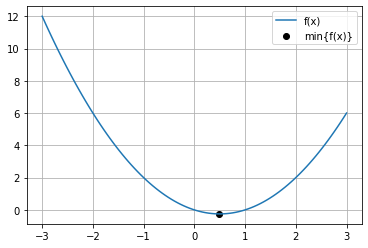

In [8]:
%matplotlib inline

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import numdifftools as nd

def golden_section_search(f, x_range, tol):
    ra_coeff = (1+np.sqrt(5))/2
    alpha = 1/ra_coeff

    xa = []
    xb = []
    xc = []
    xd = []

    xa_k = x_range[0]
    xb_k = x_range[1]
    
    xc_k = xb_k - (xb_k - xa_k)*alpha
    xd_k = xa_k + (xb_k - xa_k)*alpha

    xa.append(xa_k)
    xb.append(xb_k)
    xc.append(xc_k)
    xd.append(xd_k)

    while (abs(xb_k-xa_k) > tol):
        if (f(xc_k) < f(xd_k)):
            xb_k = xd_k
        else:
            xa_k = xc_k

        xc_k = xb_k - (xb_k - xa_k)*alpha
        xd_k = xa_k + (xb_k - xa_k)*alpha

        xa.append(xa_k)
        xb.append(xb_k)
        xc.append(xc_k)
        xd.append(xd_k)

    x_gs = (xa, xb, xc, xd)
    optimal = float((xa_k + xb_k)/2)

    return optimal, x_gs




f = lambda x: x**2 - x
tol = 0.2
x_range = [-2,2]

optimal, _ = golden_section_search(f, x_range, tol)

xpts = np.linspace(-3,3,100)
plt.plot(xpts, [f(x) for x in xpts])
plt.scatter(optimal, f(optimal), marker = 'o', color = 'k')
plt.legend(['f(x)', 'min{f(x)}'])
plt.grid()

### Método de búsqueda de Fibonacci
La relación entre dos elementos consecutivos de la serie de Fibonacci puede ser escrito como $F_{n+1}/F{n}$, y sin importar cual pareja sea, la relación es $\phi$ (Proporción aurea). Es por ello que estos dos métodos guardan cierta similitud.

Nuevamente, se escoge un rango de búsqueda entre $x_a$ y $x_b$. El proceso a seguir es el siguiente:

#### **Paso 1**
Se escoge una tolerancia. Nuevamente, este valor es el criterio de parada, cuando $(x_b - x_a) < \epsilon$. Con dicha tolerancia, se calcula un número N tal que $N = (x_b-x_a)/\epsilon$, donde N es el total de numeros de Fibonacci en los que se puede particionar el rango con una tolerancia $\epsilon$

#### **Paso 2**
Se calculan dos puntos que pertenezcan al rango de la siguiente forma:
* $x_c = x_a + (fib(N-2)/fib(N))(x_b-x_a)$
* $x_d = x_a + (fib(N-1)/fib(N))(x_b-x_a)$

Dichos valores corresponden a los valores de la serie de fibonacci en N-2 y N-1 evaluados en el rango de análisis.

#### **Paso 3**
Evaluar la función en $x_c$ y $x_d$ así:
* Si $f(x_c) > f(x_d)$ entonces se descarta el intervalo menor a $x_c$, se mueve $x_a$ hasta $x_c$, se mueve $x_c$ hasta $x_d$ y $x_b$ no se mueve.
* Si $f(x_c) \le f(x_d)$ entonces se descarta el intervalo mayor a $x_d$, se mueve $x_b$ hasta $x_d$, se mueve $x_d$ hasta $x_c$ y $x_a$ no se mueve.

#### **Paso 4**
Se reduce el total de números de Fibonacci en una unidad y se vuelve a iterar desde el paso 2.

Una vez $(x_b-x_a)<\epsilon$ y el algoritmo iterativo termine, cualquier punto en ese pequeño intervalo se considera como un optimizador, por facilidad se toma el proedio en ese intervalo

Se utiliza el mismo ejemplo: $f(x)=x^{2}-x$ y el intervalo de búsqueda del mínimo se acota entre $-2$ y $2$.

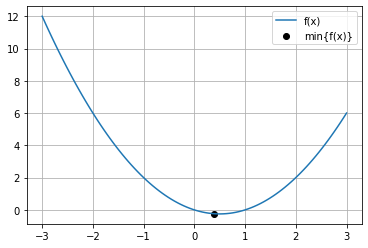

In [ ]:
def fibonacci_search(f, x_range, tol):
    xa = []
    xb = []
    xc = []
    xd = []

    xa_k = x_range[0]
    xb_k = x_range[1]

    N = int((xb_k-xa_k)/tol)
    fib_sequence = [1,1]

    while (N >= fib_sequence[-1]):
        fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])

    current_n = len(fib_sequence) - 1

    xc_k = xa_k + (fib_sequence[current_n-2]/fib_sequence[current_n])*(xb_k - xa_k)
    xd_k = xa_k + (fib_sequence[current_n-1]/fib_sequence[current_n])*(xb_k - xa_k)

    xa.append(xa_k)
    xb.append(xb_k)
    xc.append(xc_k)
    xd.append(xd_k)

    current_n -= 1


    while (current_n >= 1):
        if (f(xc_k) > f(xd_k)):
            xa_k = xc_k
            xc_k = xd_k
            xd_k = xa_k + (fib_sequence[current_n-1]/fib_sequence[current_n])*(xb_k - xa_k)
        else:
            xb_k = xd_k
            xd_k = xc_k
            xc_k = xa_k + (fib_sequence[current_n-2]/fib_sequence[current_n])*(xb_k - xa_k)

        xa.append(xa_k)
        xb.append(xb_k)
        xc.append(xc_k)
        xd.append(xd_k)

        current_n -= 1

    x_fs = (xa, xb, xc, xd)

    optimal = float((xb_k + xa_k)/2)
    return (optimal, x_fs)

tol = 0.2
optimal, _ = fibonacci_search(f, x_range, tol)

xpts = np.linspace(-3,3,100)
plt.plot(xpts, [f(x) for x in xpts])
plt.scatter(optimal, f(optimal), marker = 'o', color = 'k')
plt.legend(['f(x)', 'min{f(x)}'])
plt.grid()




### Aplicación al Método del Gradiente Descendente
Para el gradiente descendente se tienen las siguientes reglas de actualización:
$$\mathbf{x}_{k+1} = \mathbf{x}_{k} -\alpha_k\nabla f(\mathbf{x}_k)$$
con
$$\alpha_k = \min_{\alpha_k \ge0}{\phi(\alpha_k)} = \min_{\alpha\ge0}{f(\mathbf{x}_k-\alpha_k\nabla f(\mathbf{x}_k))}$$

Para hallar $\alpha_k$ se pueden aplicar los métodos anteriormente explicados, por ello, se debe tener la función $\phi$ como constante respecto a $\mathbf{x}_k$ y dependiente de $\alpha_k$. Así, el espacio que se tiene es un $\alpha$ *vs* $\phi(\alpha)$.

A estas alturas ya se tienen definidos los rangos y los dominios, ahora, es necesario especificar el intervalo de búsqueda. Por definición, $\alpha$ debería ser pequeño (Cercano a cero si es posible) para que el algoritmo del gradiente sea estable, por ello, se define el rango entre $\approx 0$ (No nulo) y $0.5$.

Para el ejemplo, se propone la función $f(x) = x^{4} - x^{3} - 2x^{2}$ porque es una función no monotónicamente decendiente (Hay una cresta entre dos mínimos). Se utilizan los dos métodos y diferentes puntos de inicio. Los resultados son graficados al final.

1.443004808563199


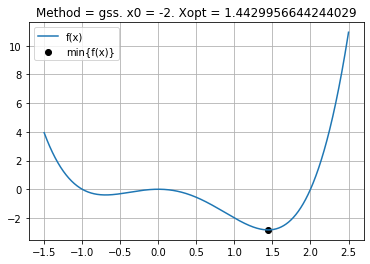

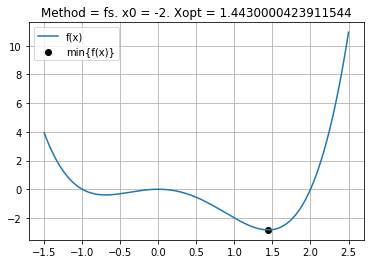

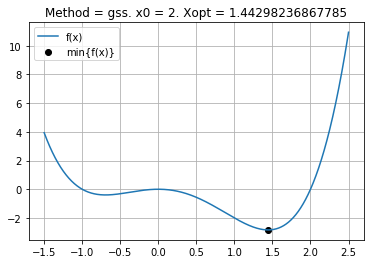

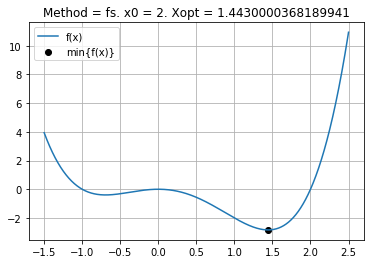

In [ ]:
}def descendent_gradient(f, x0, tol, alpha_optimization):
    x = []

    x.append(x0)

    f_grad = nd.Gradient(f)

    phi = lambda a: f(x[-1]-a*f_grad([x[-1]]))
    alpha_tol = 0.2
    alpha_range = [0.00001,0.5]

    if (alpha_optimization == 'gss'):
        alpha, _ = golden_section_search(phi, alpha_range, alpha_tol)
    elif (alpha_optimization == 'fs'):
        alpha, _ = fibonacci_search(phi, alpha_range, alpha_tol)

    x.append(x[-1] - alpha*float(f_grad(x[-1])))

    error = [0]
    error.append(abs(x[-1] - x[-2])/max(1,abs(x[-2])))

    k = 1
    while (error[k] > tol):
        phi = lambda a: f(x[-1]-a*f_grad([x[-1]]))
        if (alpha_optimization == 'gss'):
            alpha, _ = golden_section_search(phi, alpha_range, alpha_tol)
        elif (alpha_optimization == 'fs'):
            alpha, _ = fibonacci_search(phi, alpha_range, alpha_tol)
        x.append(x[-1] - alpha*float(f_grad(x[-1])))
        error.append(abs(x[-1] - x[-2])/max(1,abs(x[-2])))
        k += 1

    optimal = x[-1]
    return optimal

def plot_results(f, x_opt, x0, method):
    xpts = np.linspace(-1.5,2.5,1000)
    plt.plot(xpts, [f(x) for x in xpts])
    plt.scatter(x_opt, f(x_opt), marker = 'o', color = 'k')
    title_str = 'Method = ' + method +'. x0 = ' + str(x0) +'. Xopt = ' + str(x_opt)
    plt.title(title_str)
    plt.legend(['f(x)', 'min{f(x)}'])
    plt.grid()
    plt.show()


f = lambda x: x**4 - x**3 - 2*x**2
tol = 0.0001
x0 = [-2,2]
methods = ['gss', 'fs']

print(descendent_gradient(f, -1.5, tol, 'gss'))

for point in range(len(x0)):
    for method in range(len(methods)):
        x_opt = descendent_gradient(f, x0[point], tol, methods[method])
        plot_results(f, x_opt, x0[point], methods[method])